NameError: name 'gene_expression' is not defined

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv("gene_expression (2).csv")                                                                                                                                                          

In [6]:
df

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1
...,...,...,...
2995,5.0,6.5,1
2996,3.4,6.6,0
2997,2.7,6.5,0
2998,3.3,5.6,0


(6.0, 10.0)

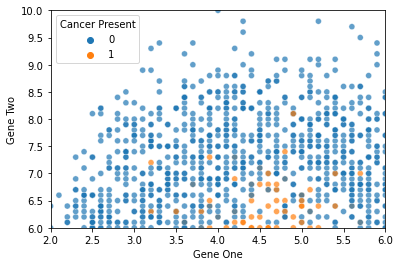

In [7]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)
plt.xlim(2,6)
plt.ylim(6,10)

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [9]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
scaler=StandardScaler()

In [12]:
scaled_X_train=scaler.fit_transform(X_train)
scaled_X_test=scaler.transform(X_test)

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn_model=KNeighborsClassifier(n_neighbors=6)

In [15]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [16]:
y_pred=knn_model.predict(scaled_X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
accuracy_score(y_test,y_pred)

0.9355555555555556

In [19]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       470
           1       0.95      0.91      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.93      0.94       900
weighted avg       0.94      0.94      0.94       900



In [20]:
test_error_rates=[]

for k in range(1,30):
    knn_model=KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    
    y_pred=knn_model.predict(scaled_X_test)
    
    test_error=1-accuracy_score(y_test,y_pred)
    test_error_rates.append(test_error)

In [21]:
test_error_rates

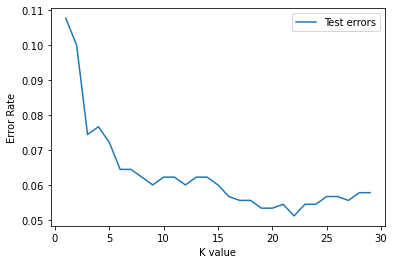

In [22]:
plt.plot(range(1,30),test_error_rates,label='Test errors')
plt.ylabel('Error Rate')
plt.xlabel('K value')
plt.legend()

In [23]:

knn_model=KNeighborsClassifier()
knn_model.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [24]:
operations=[('scaler',StandardScaler()),('knn_model',KNeighborsClassifier())]

In [25]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
k_values=list(range(1,20))

In [28]:
param_grid={'knn_model__n_neighbors':k_values}

In [29]:
full_cv_classifier=GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [30]:
full_cv_classifier.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn_model', KNeighborsClassifier())]),
             param_grid={'knn_model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14, 15, 16,
                                                    17, 18, 19]},
             scoring='accuracy')

In [31]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn_model', KNeighborsClassifier(n_neighbors=14))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn_model': KNeighborsClassifier(n_neighbors=14),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn_model__algorithm': 'auto',
 'knn_model__leaf_size': 30,
 'knn_model__metric': 'minkowski',
 'knn_model__metric_params': None,
 'knn_model__n_jobs': None,
 'knn_model__n_neighbors': 14,
 'knn_model__p': 2,
 'knn_model__weights': 'uniform'}

In [ ]:
#creating final model

In [32]:
scaler=StandardScaler()

In [33]:
knn14=KNeighborsClassifier(n_neighbors=14)

In [34]:
operations=[('scaler',scaler),('knn14',knn14)]

In [35]:
pipe=Pipeline(operations)

In [36]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn14', KNeighborsClassifier(n_neighbors=14))])

In [37]:
pipe_pred=pipe.predict(X_test)

In [39]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       470
           1       0.95      0.92      0.93       430

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [40]:
new_patient=[[3.8,6.4]]

In [41]:
full_cv_classifier.predict(new_patient)

array([0], dtype=int64)